In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro

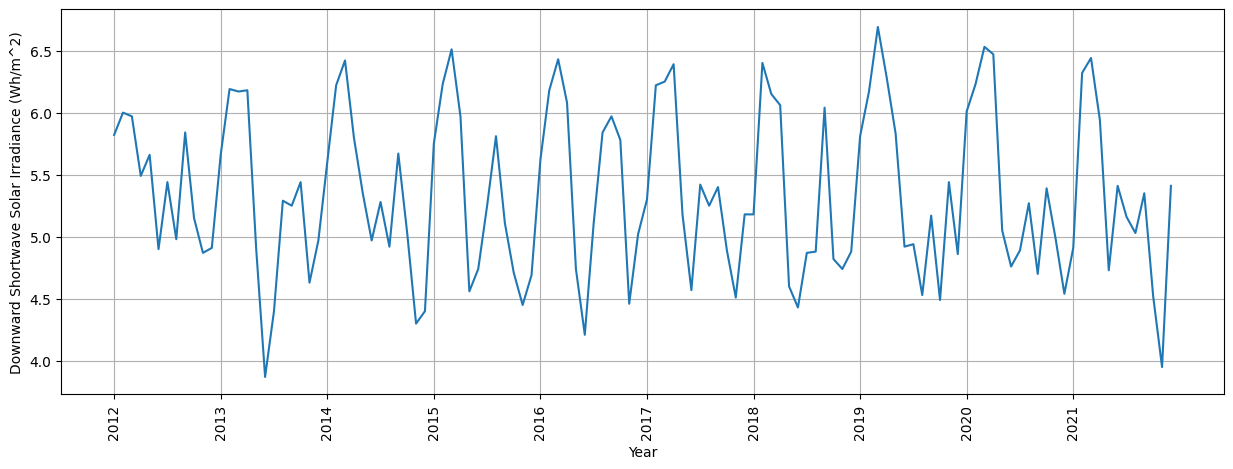

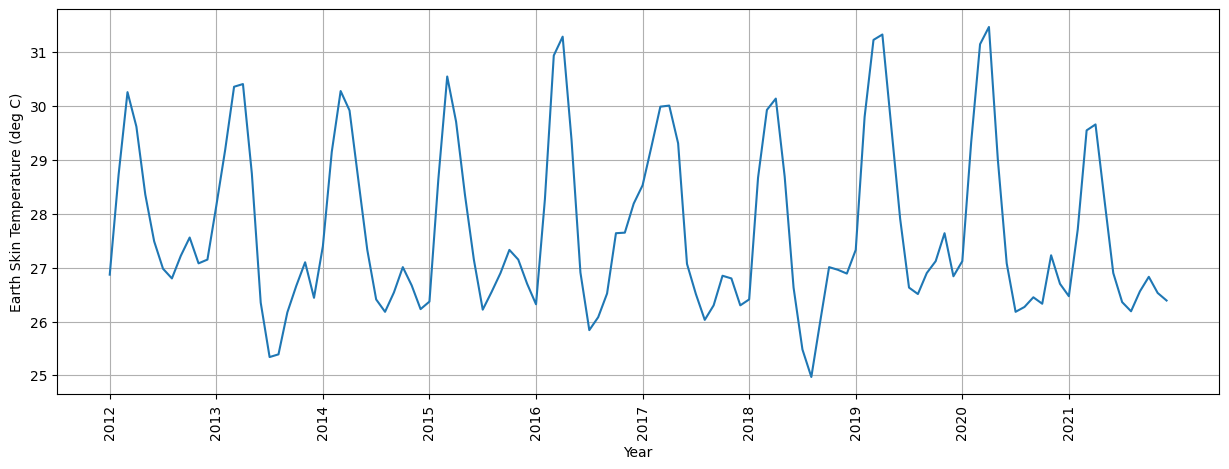

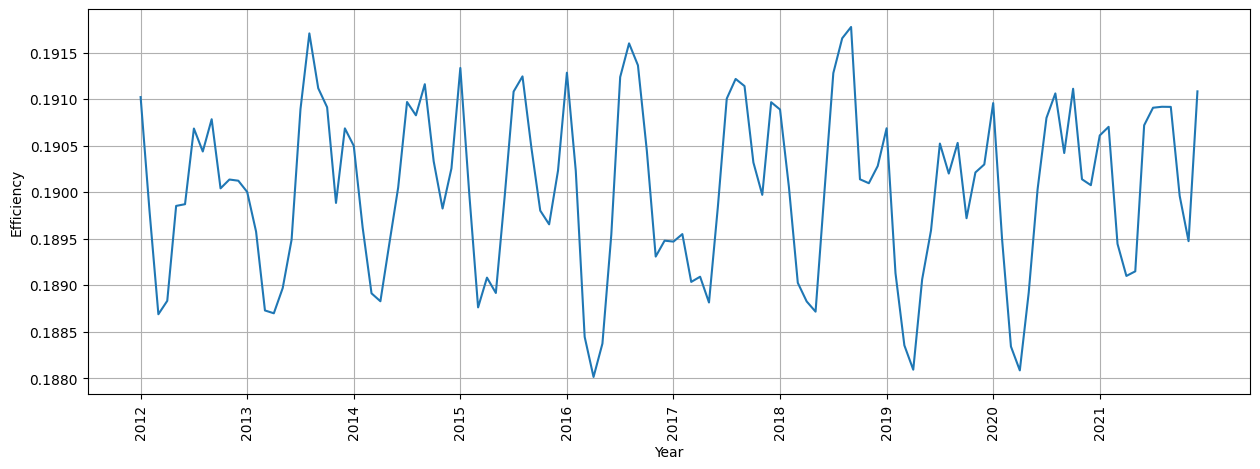

In [70]:
dfT = pd.read_csv("TS.csv")
dfI = pd.read_csv("IRR.csv")
df = dfT
df["ALLSKY_SFC_SW_DWN"] = dfI["ALLSKY_SFC_SW_DWN"]
df.columns = ["MO","TS","ALLSKY_SFC_SW_DWN"]

Eff = pd.read_csv("Efficiency_Mo.csv")
df["Efficiency"] = Eff["Efficiency"] 

years = np.arange(2012,2022)
index = np.arange(0,len(df['Efficiency']),12)

plt.figure(figsize=(15,5))
plt.plot(df["ALLSKY_SFC_SW_DWN"])
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.xlabel("Year")
plt.ylabel("Downward Shortwave Solar Irradiance (Wh/m^2)")
plt.grid()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df["TS"])
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Earth Skin Temperature (deg C)")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(df["Efficiency"])
plt.xlabel("Year")
plt.ylabel("Efficiency")
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()

Mean = 5.349166666666667
Std. Deviation = 0.6562197082955948
Skewness = 0.12483512340729205
Kurtosis = -0.9542171041301124


Text(0.5, 0, 'Downward Shortwave Solar Irradiance (kWh/m^2)')

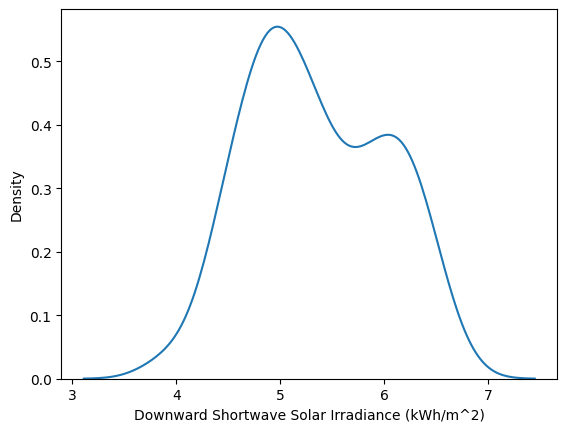

In [45]:
from scipy.stats import skew, kurtosis 

print("Mean =",np.mean(df["ALLSKY_SFC_SW_DWN"]))
print("Std. Deviation =",np.std(df["ALLSKY_SFC_SW_DWN"]))
print("Skewness =",skew(df["ALLSKY_SFC_SW_DWN"]))
print("Kurtosis =",kurtosis(df["ALLSKY_SFC_SW_DWN"]))
sns.kdeplot(df["ALLSKY_SFC_SW_DWN"])
plt.xlabel("Downward Shortwave Solar Irradiance (kWh/m^2)")


Mean = 27.70116666666667
Std. Deviation = 1.5511953365782862
Skewness = 0.7638287491158489
Kurtosis = -0.46950237464013833


Text(0, 0.5, 'Earth Skin Temperature (deg C)')

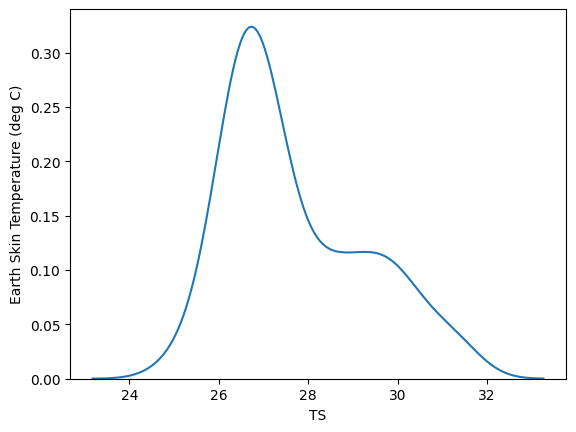

In [47]:
print("Mean =",np.mean(df['TS']))
print("Std. Deviation =",np.std(df['TS']))
print("Skewness =",skew(df['TS']))
print("Kurtosis =",kurtosis(df['TS']))
sns.kdeplot(df['TS'])
plt.ylabel("Earth Skin Temperature (deg C)")


Mean = 0.19003034055900567
Std. Deviation = 0.0009065272318472191
Skewness = -0.22730333119564522
Kurtosis = -0.7996539675704835


<Axes: xlabel='Efficiency', ylabel='Density'>

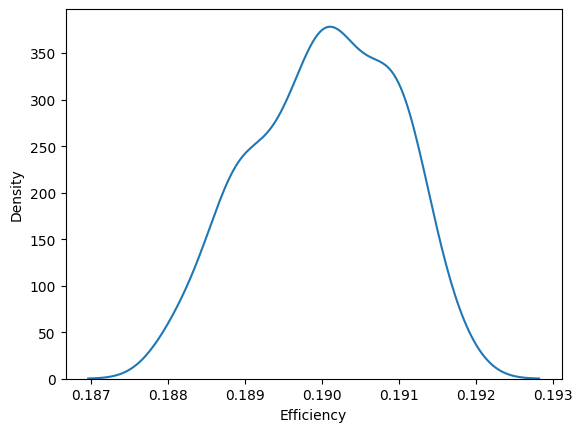

In [84]:
print("Mean =",np.mean(df['Efficiency']))
print("Std. Deviation =",np.std(df['Efficiency']))
print("Skewness =",skew(df['Efficiency']))
print("Kurtosis =",kurtosis(df['Efficiency']))
sns.kdeplot(df['Efficiency'])

C:\Users\HP\AppData\Local\Temp\ipykernel_20676\1644237998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Season"]="Dec_Feb"
C:\Users\HP\AppData\Local\Temp\ipykernel_20676\1644237998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Season"]="Mar_May"
C:\Users\HP\AppData\Local\Temp\ipykernel_20676\1644237998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

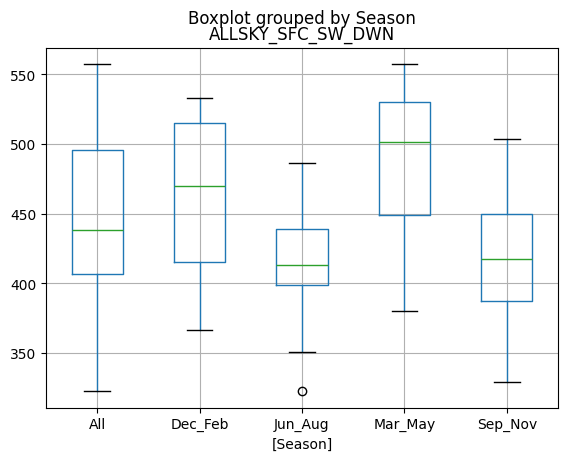

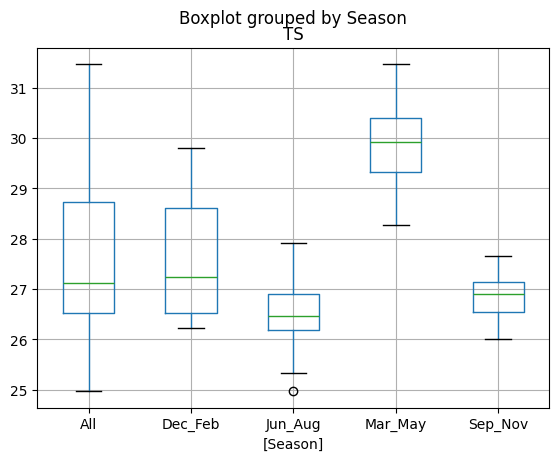

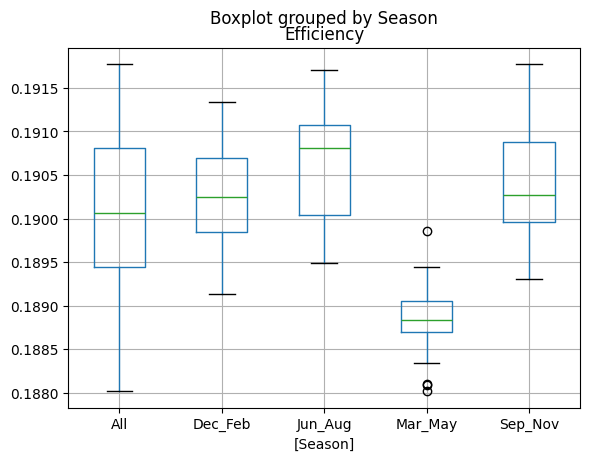

In [9]:
df1 = df[((df["MO"]=="DEC") | (df["MO"]=="JAN") | (df["MO"] =="FEB"))]
df2 = df[((df["MO"]=="MAR") | (df["MO"]=="APR") | (df["MO"] =="MAY"))]
df3 = df[((df["MO"]=="JUN") | (df["MO"]=="JUL") | (df["MO"] =="AUG"))]
df4 = df[((df["MO"]=="SEP") | (df["MO"]=="OCT") | (df["MO"] =="NOV"))]
df1["Season"]="Dec_Feb"
df2["Season"]="Mar_May"
df3["Season"]="Jun_Aug"
df4["Season"]="Sep_Nov"
df["Season"]="All"

cdf = pd.concat([df1,df2,df3,df4,df])
cdf["ALLSKY_SFC_SW_DWN"] = cdf["ALLSKY_SFC_SW_DWN"]*1000/12
cdfT = cdf.drop(columns=["MO","ALLSKY_SFC_SW_DWN","Efficiency"])    
cdfR = cdf.drop(columns=["MO","TS","Efficiency"]) 
cdfE = cdf.drop(columns=["MO","ALLSKY_SFC_SW_DWN","TS"])    

boxplot = cdfR.boxplot(by="Season")
plt.show()
boxplot = cdfT.boxplot(by="Season")
plt.show()
boxplot = cdfE.boxplot(by="Season")
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(eff):
    result=adfuller(eff,maxlag=24,autolag=None)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    return result

result=adfuller_test(df['Efficiency'])

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("Weak evidence against null hypothesis,indicating it is non-stationary ")

ADF Test Statistic : -3.336332842289548
p-value : 0.013330479906570528
#Lags Used : 24
Number of Observations : 95
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


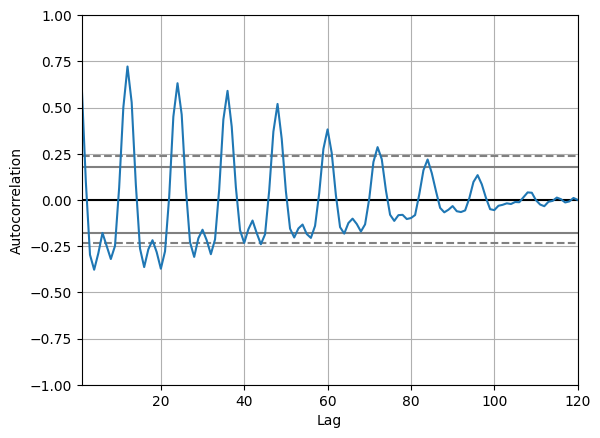

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Efficiency'])
plt.show()

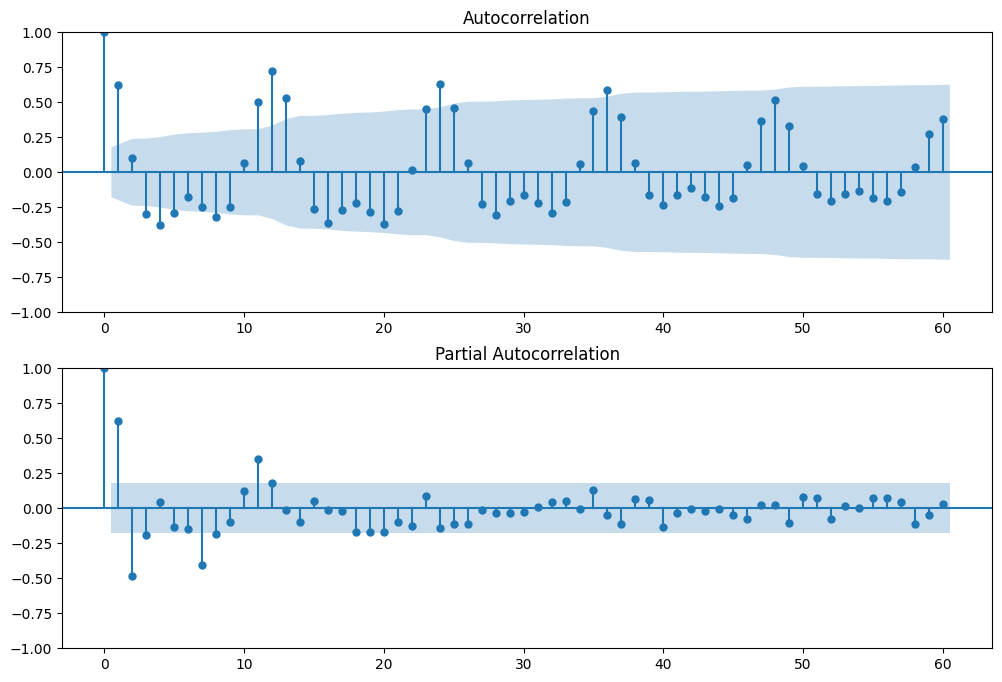

In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Efficiency'],lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Efficiency'],lags=60,ax=ax2)

In [13]:
import statsmodels.api as sm
# models=sm.tsa.statespace.SARIMAX(df['Efficiency'],order=(0,0,1),seasonal_order=(1,0,0,12))
models=sm.tsa.statespace.SARIMAX(df['Efficiency'],order=(0,0,1),seasonal_order=(1,1,0,12))

models_fit=models.fit()
models_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Efficiency   No. Observations:                  120
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                 661.609
Date:                             Wed, 17 Jul 2024   AIC                          -1317.218
Time:                                     15:32:03   BIC                          -1309.172
Sample:                                          0   HQIC                         -1313.956
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4575      0.086      5.333      0.000       0.289       0.626
ar.S.L12      -0.5034      0.116     -4.324      0.000      -0.732      -0.275
sigma2       2.69e-07    3.3e-08      8.155      0.000    2.04e-07    3.34e-07
===================================================================================
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):                 4.60
Prob(Q):                              0.22   Prob(JB):                         0.10
Heteroskedasticity (H):               2.24   Skew:                             0.22
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from statsmodels.tsa.arima.model import ARIMA
modela=ARIMA(df['Efficiency'],order=(2,0,1))
modela_fit=modela.fit()
modela_fit.summary()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Efficiency   No. Observations:                  120
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 721.347
Date:                Wed, 17 Jul 2024   AIC                          -1432.694
Time:                        15:32:04   BIC                          -1418.757
Sample:                             0   HQIC                         -1427.034
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1900    8.3e-05   2290.845      0.000       0.190       0.190
ar.L1          1.2000      0.149      8.044      0.000       0.908       1.492
ar.L2         -0.6610      0.106     -6.211      0.000      -0.870      -0.452
ma.L1         -0.3170      0.164     -1.932      0.053      -0.638       0.005
sigma2      3.423e-07   5.18e-08      6.611      0.000    2.41e-07    4.44e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.99   Prob(JB):                         0.67
Heteroskedasticity (H):               1.43   Skew:                             0.15
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

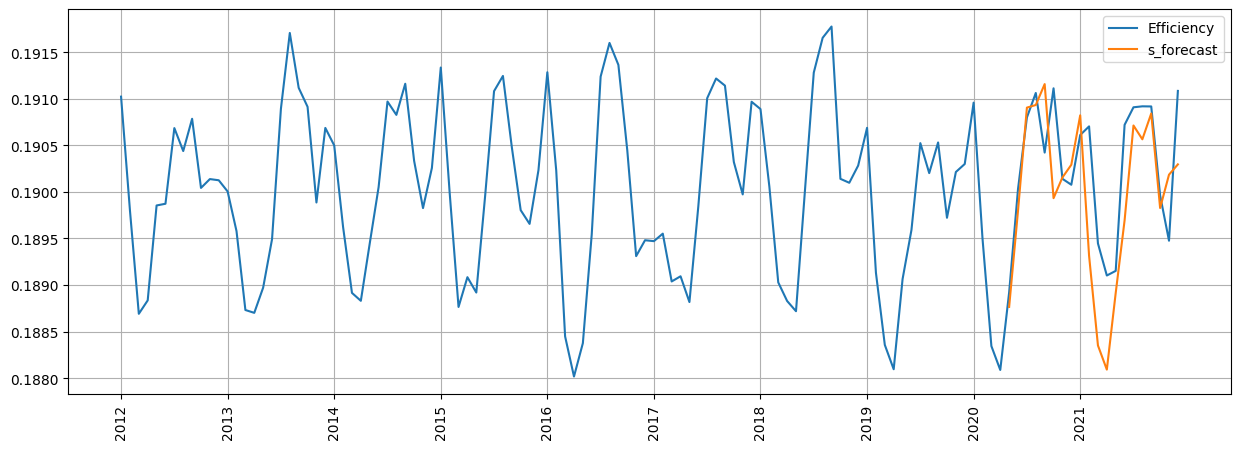

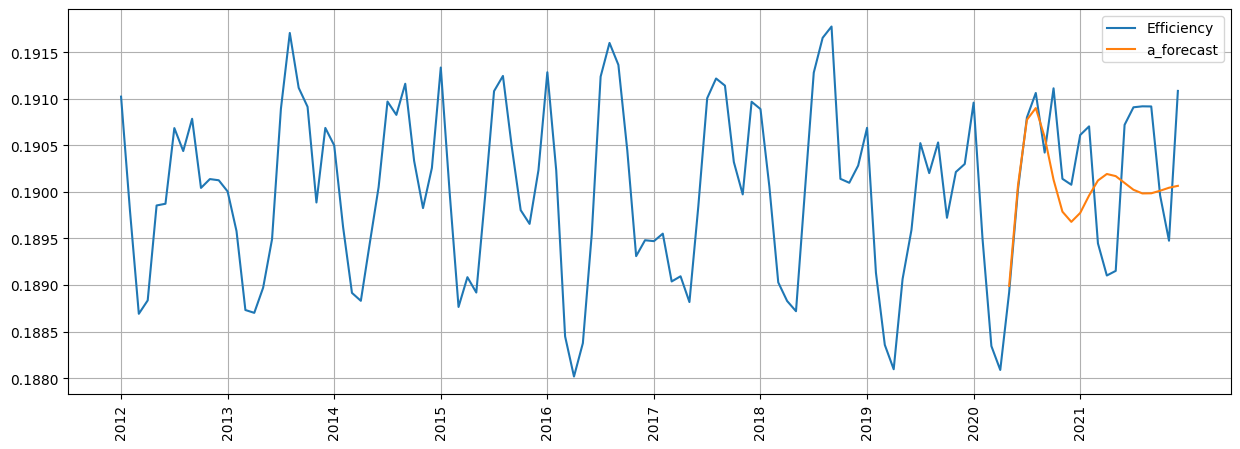

In [15]:
# df1.index=np.arange(df1.shape[0])
df['s_forecast']=models_fit.predict(start=100,end=120,dynamic=True)
df['a_forecast']=modela_fit.predict(start=100,end=120,dynamic=True)


df[['Efficiency','s_forecast']].plot(figsize=(15,5))
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()

df[['Efficiency','a_forecast']].plot(figsize=(15,5))
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()


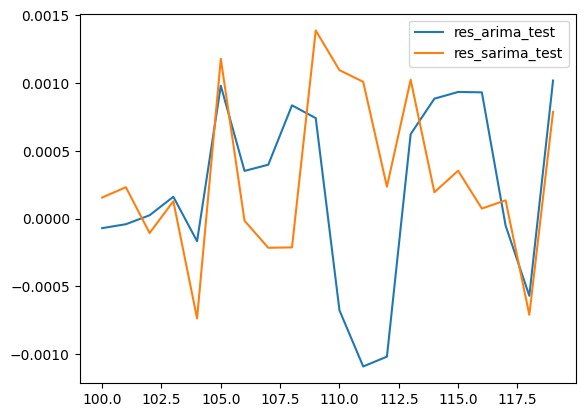

ARIMA rmse test 0.0006902120828954672
SARIMA rmse test 0.0006597404133369622


In [16]:
res_a = df["Efficiency"][100:]-df["a_forecast"][100:]
plt.plot(res_a, label="res_arima_test")
res_s = df["Efficiency"][100:]-df["s_forecast"][100:]
plt.plot(res_s,label="res_sarima_test")
plt.legend()
plt.show()

rmse_a = np.sqrt(np.mean(res_a**2))
rmse_s = np.sqrt(np.mean(res_s**2))

print("ARIMA rmse test", rmse_a)
print("SARIMA rmse test", rmse_s)


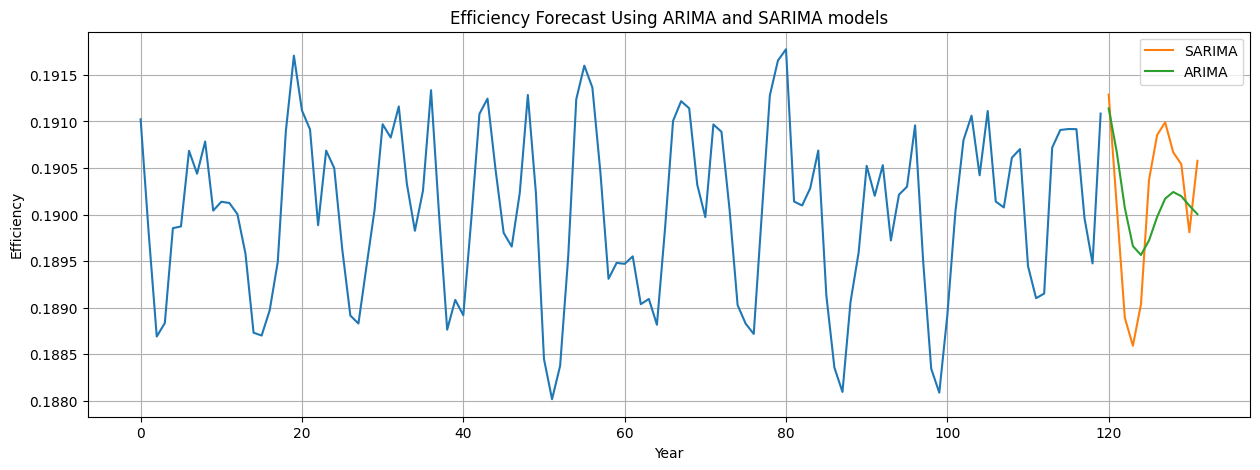

In [76]:
s_forecast_future=models_fit.forecast(12)
a_forecast_future=modela_fit.forecast(12)
df["s_forecast_future"] = None
df["a_forecast_future"] = None

plt.figure(figsize=(15,5))
plt.plot(df["Efficiency"])
plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.legend()
plt.ylabel("Efficiency")
plt.xlabel("Year")
plt.title("Efficiency Forecast Using ARIMA and SARIMA models")
plt.grid()
plt.show()

Epoch 1/300


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 - 1s - 10ms/step - loss: 0.3370
Epoch 2/300
85/85 - 0s - 853us/step - loss: 0.2078
Epoch 3/300
85/85 - 0s - 811us/step - loss: 0.1168
Epoch 4/300
85/85 - 0s - 783us/step - loss: 0.0760
Epoch 5/300
85/85 - 0s - 782us/step - loss: 0.0632
Epoch 6/300
85/85 - 0s - 761us/step - loss: 0.0588
Epoch 7/300
85/85 - 0s - 771us/step - loss: 0.0567
Epoch 8/300
85/85 - 0s - 753us/step - loss: 0.0552
Epoch 9/300
85/85 - 0s - 755us/step - loss: 0.0538
Epoch 10/300
85/85 - 0s - 840us/step - loss: 0.0525
Epoch 11/300
85/85 - 0s - 844us/step - loss: 0.0512
Epoch 12/300
85/85 - 0s - 839us/step - loss: 0.0499
Epoch 13/300
85/85 - 0s - 837us/step - loss: 0.0486
Epoch 14/300
85/85 - 0s - 828us/step - loss: 0.0472
Epoch 15/300
85/85 - 0s - 805us/step - loss: 0.0458
Epoch 16/300
85/85 - 0s - 809us/step - loss: 0.0444
Epoch 17/300
85/85 - 0s - 784us/step - loss: 0.0430
Epoch 18/300
85/85 - 0s - 754us/step - loss: 0.0416
Epoch 19/300
85/85 - 0s - 770us/step - loss: 0.0402
Epoch 20/300
85/85 - 0s - 768us/st

Text(0.5, 0, 'Training Loss for LSTM (Dense = 12)')

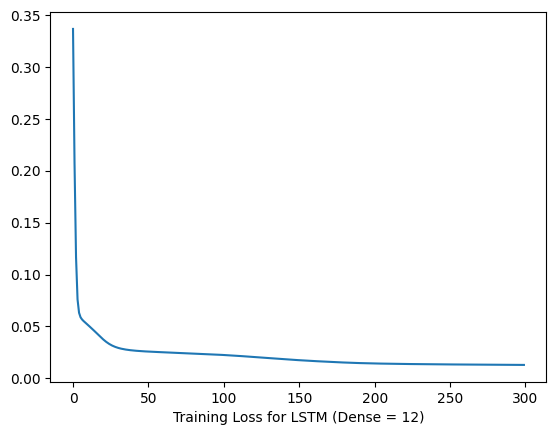

In [78]:
# LSTM final
#https://stackoverflow.com/questions/69906416/forecast-future-values-with-lstm-in-python/69912334#69912334
lookback = 24
n_forecast = 12
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(y, n_lookback, n_forecast=12):
 X, Y = [], []
 for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
 return np.array(X), np.array(Y)


# fix random seed for reproducibility
tf.random.set_seed(0)

# load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values
# print(dataframe.head())

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


train_size = int(len(dataset) * 1)
train = dataset[0:train_size]

# reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train, lookback)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(n_forecast))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=1, verbose=2)
plt.plot(history.history["loss"])
plt.xlabel("Training Loss for LSTM (Dense = 12)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


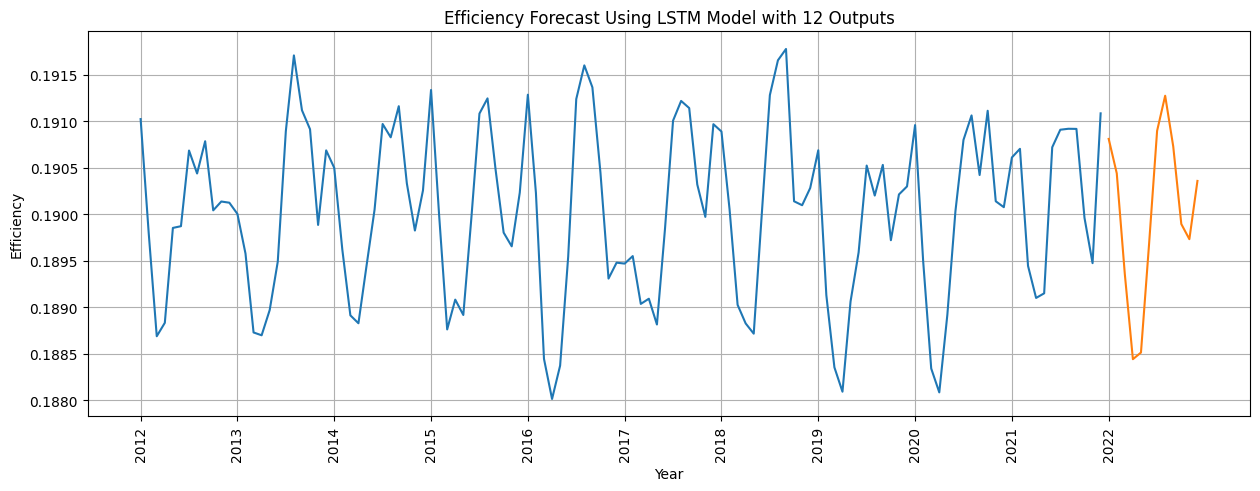

In [80]:
X_ = dataset[- lookback:]  # last available input sequence
X_ = X_.reshape(1,1, lookback)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)
a = np.empty_like(dataset)
a[:,:] = np.nan
Y_=np.append(a,Y_)

# plot baseline and predictions

plt.figure(figsize=(15,5))
years = np.arange(2012,2023)
index = np.arange(0,132,12)
plt.plot(scaler.inverse_transform(dataset))
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.ylabel("Efficiency")
plt.xlabel("Year")
plt.title("Efficiency Forecast Using LSTM Model with 12 Outputs")
plt.grid()
plt.plot(Y_)
plt.show()


Epoch 1/300


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 - 1s - 9ms/step - loss: 0.2349
Epoch 2/300
96/96 - 0s - 797us/step - loss: 0.0624
Epoch 3/300
96/96 - 0s - 741us/step - loss: 0.0440
Epoch 4/300
96/96 - 0s - 804us/step - loss: 0.0340
Epoch 5/300
96/96 - 0s - 880us/step - loss: 0.0272
Epoch 6/300
96/96 - 0s - 1ms/step - loss: 0.0236
Epoch 7/300
96/96 - 0s - 938us/step - loss: 0.0217
Epoch 8/300
96/96 - 0s - 832us/step - loss: 0.0206
Epoch 9/300
96/96 - 0s - 815us/step - loss: 0.0198
Epoch 10/300
96/96 - 0s - 828us/step - loss: 0.0193
Epoch 11/300
96/96 - 0s - 813us/step - loss: 0.0188
Epoch 12/300
96/96 - 0s - 815us/step - loss: 0.0184
Epoch 13/300
96/96 - 0s - 821us/step - loss: 0.0181
Epoch 14/300
96/96 - 0s - 805us/step - loss: 0.0178
Epoch 15/300
96/96 - 0s - 892us/step - loss: 0.0174
Epoch 16/300
96/96 - 0s - 824us/step - loss: 0.0172
Epoch 17/300
96/96 - 0s - 824us/step - loss: 0.0169
Epoch 18/300
96/96 - 0s - 779us/step - loss: 0.0166
Epoch 19/300
96/96 - 0s - 768us/step - loss: 0.0164
Epoch 20/300
96/96 - 0s - 796us/step 

Text(0.5, 0, 'Training Loss for LSTM (Dense = 1)')

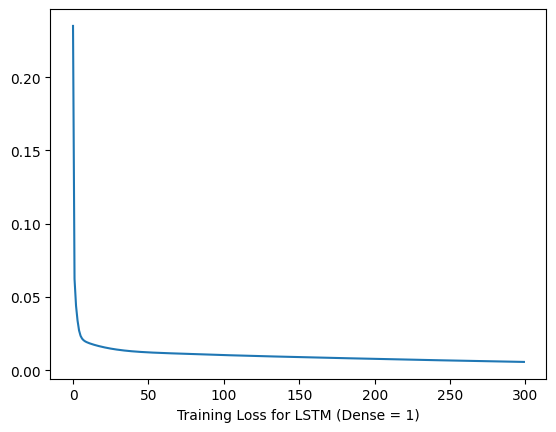

In [81]:
# LSTM - single output
#https://stackoverflow.com/questions/69906416/forecast-future-values-with-lstm-in-python/69912334#69912334
lookback = 24
n_forecast = 1
# # convert an array of values into a dataset matrix
def create_dataset(y, n_lookback, n_forecast=1):
 X, Y = [], []
 for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
 return np.array(X), np.array(Y)


# fix random seed for reproducibility
tf.random.set_seed(0)

# # load the dataset
dataframe = pd.DataFrame(df.index.values)
dataframe["Eff"] = df["Efficiency"]
dataframe = pd.DataFrame(df["Efficiency"])
dataset = dataframe.values

# # normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


train_size = int(len(dataset) * 1)
train = dataset[0:train_size]

# # reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train, lookback)

# # reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# # create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(n_forecast))
model.compile(loss='mean_squared_error', optimizer='adam')
history1 = model.fit(trainX, trainY, epochs=300, batch_size=1, verbose=2)
plt.plot(history1.history["loss"])
plt.xlabel("Training Loss for LSTM (Dense = 1)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[array([[0.19139141]], dtype=float32), array([[0.190688]], dtype=float32), array([[0.1889719]], dtype=float32), array([[0.18843582]], dtype=float32), array([[0.18818884]], dtype=float32), array([[0.18957254]], dtype=float32), array([[0.19063342]], dtype=float32), array([[0.19098821]], dtype=float32), array([[0.19033732]], dtype=float32), array([[0.18955296]], dtype=float32), array([[0.1893479]], dtype=float32), array([[0.1899489]], dtype=float32)]
[0.19139141 0.190688   0.18897191 0.18843582 0.18818884 0.18957254
 0.19063342 0.19098821 0.

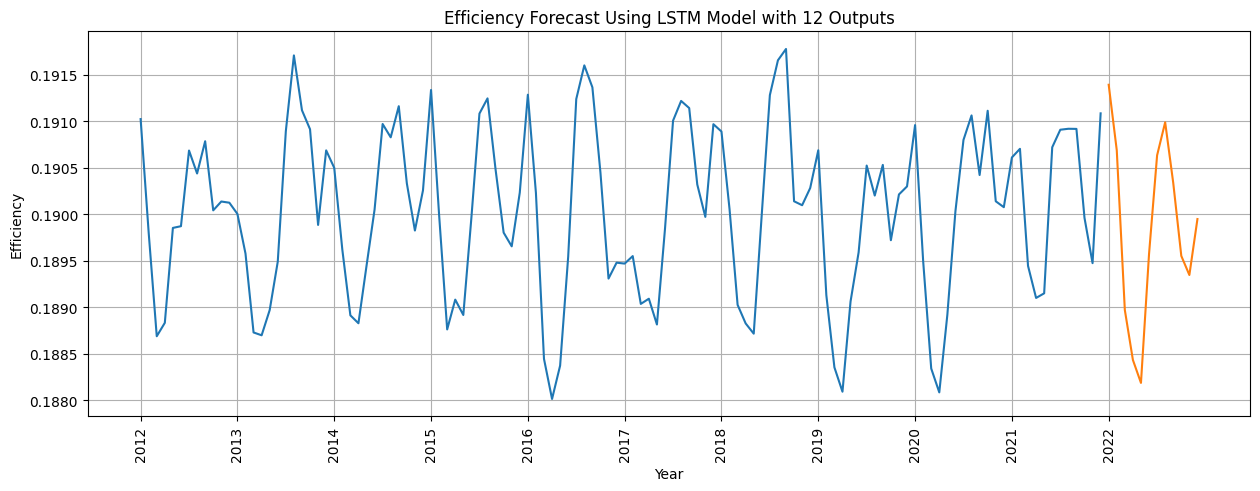

In [83]:
X_1 = dataset[- lookback:]  # last available input sequence
X_1 = X_1.reshape(1,1, lookback)

Y1 = []
for i in range(12):
  Y_1 = model.predict(X_1).reshape(-1, 1)
  Y1.append(scaler.inverse_transform(Y_1))
  Y_1 = Y_1.reshape(1,1,1)
  X_1 = X_1[:,:,1:]
#   print(X_1.ndim)
  X_1 = np.append(X_1,Y_1,axis=2)
  
Y11=[]
# Y_1 = scaler.inverse_transform(Y_1)
a = np.empty_like(dataset)
a[:,:] = np.nan
print(Y1)
Y1=np.append(a,Y1)
print(Y1[120:])

# plot baseline and predictions
plt.figure(figsize=(15,5))
years = np.arange(2012,2023)
index = np.arange(0,132,12)
plt.plot(scaler.inverse_transform(dataset))
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.title("Efficiency Forecast Using LSTM Model with 12 Outputs")
plt.grid()
plt.ylabel("Efficiency")
plt.xlabel("Year")
plt.plot(Y1)
plt.show()

In [29]:
df_22=pd.read_csv("Monthly_2022.csv")

n = 1
k = 1.38*10**-23
q = 1.6*10**-19
T_ref = 298
H_ref = 1000
P_mpp_ref = 435
I_mpp_ref = 5.97
V_mpp_ref = 72.9
V_oc_ref = 85.6
I_sc_ref = 6.43
I_sc_coeff = 2.6*10**-3
V_oc_coeff = -.2355

Efficiency_22=np.empty(12)

for j in range(12):
        T = (df_22['TS'][j])+273
        H = (df_22['ALLSKY_SFC_SW_DWN'][j])*1000/12
    
        a_ref = n*k*T_ref/q
        R_s = (a_ref *128* math.log(1-(I_mpp_ref/I_sc_ref))-V_mpp_ref+V_oc_ref)/I_mpp_ref
        a = n*k*T/q

        I_pv = H*(I_sc_ref + I_sc_coeff*(T-T_ref))/H_ref
        I0 = I_pv/(math.exp((V_oc_ref + V_oc_coeff*(T-T_ref) - a_ref*128*math.log(I_sc_ref/I_pv))/(a*128)-1))

      
        I = np.arange(0,I_pv + I0,.0002)

        V = np.zeros_like(I)
        P = np.zeros_like(I)
        dP = np.zeros_like(I)
        L = np.zeros_like(I)
        K = np.zeros_like(I)
        for i in range(len(I)):
            V[i] = a*128*math.log((-(I[i]-I_pv-I0))/I0) - I[i]*R_s
            P[i] = V[i] * I[i]            
      
        '''
        for i in range(len(P)):
            if P[i] == np.max(P):
                print((I[i]*V[i]),I[i], V[i])
                break
        '''
        Efficiency_22[j] = np.max(P)/(H*2.162)
        # print(Efficiency[j+120])

ad = np.empty_like(dataset)
ad[:,:] = np.nan
Efficiency22 = np.append(ad,Efficiency_22.reshape(-1,1))

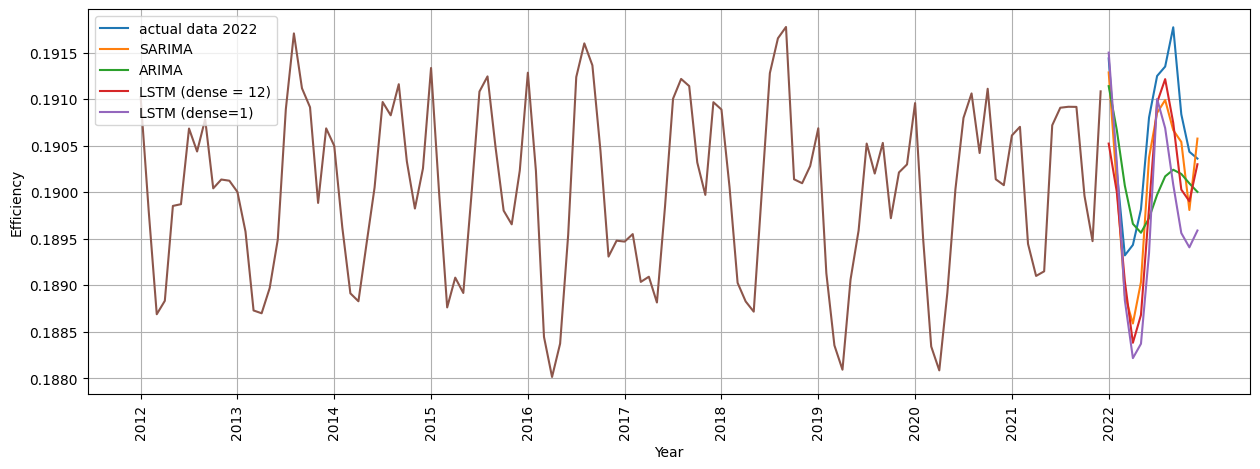

In [73]:
years = np.arange(2012,2023)
index = np.arange(0,132,12)
plt.figure(figsize=(15,5))

plt.plot(Efficiency22,label = "actual data 2022")
plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.plot(Y_,label = "LSTM (dense = 12)")
plt.plot(Y1,label="LSTM (dense=1)")
plt.plot(df["Efficiency"])
plt.ylabel("Efficiency")
plt.xlabel("Year")
plt.legend()
plt.xticks(ticks = index,labels = years,rotation = 90)
plt.grid()
plt.show()



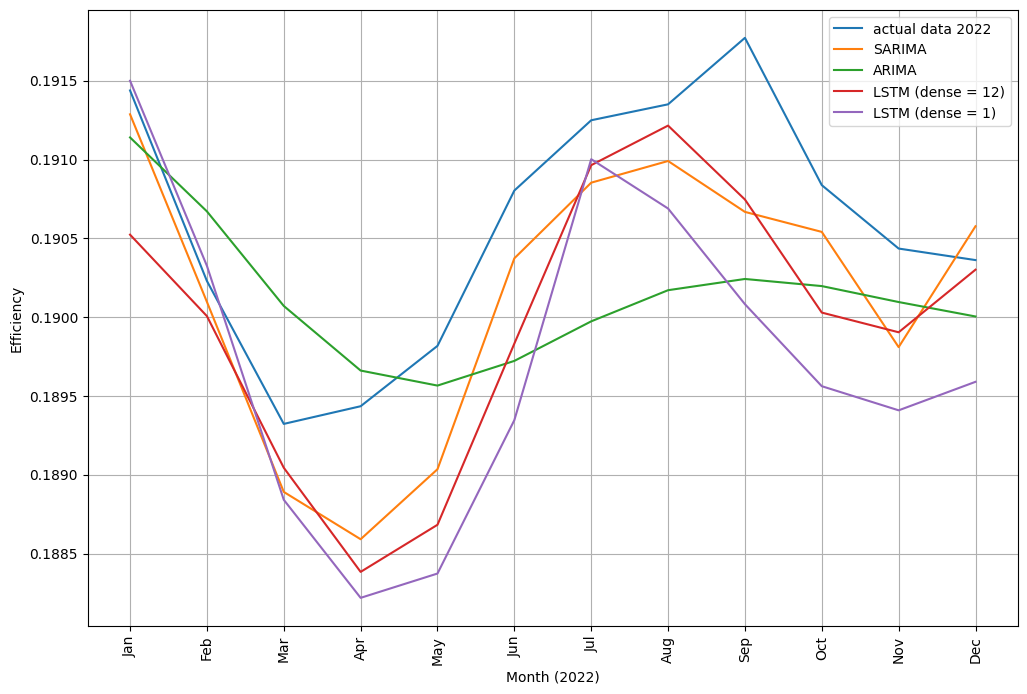

In [67]:
ind = np.arange(120,132)
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# plt.plot(df["Efficiency"])
plt.figure(figsize=(12,8))

plt.plot(Efficiency22,label = "actual data 2022")

plt.plot(df["s_forecast_future"]._append(s_forecast_future[:]),label="SARIMA")
plt.plot(df["a_forecast_future"]._append(a_forecast_future[:]),label="ARIMA")
plt.plot(Y_,label = "LSTM (dense = 12)")
plt.plot(Y1,label="LSTM (dense = 1)")
plt.xlabel("Month (2022)")
plt.ylabel("Efficiency")
plt.legend()
plt.xticks(ticks=ind,labels = months,rotation = 90)
plt.grid()
plt.show()

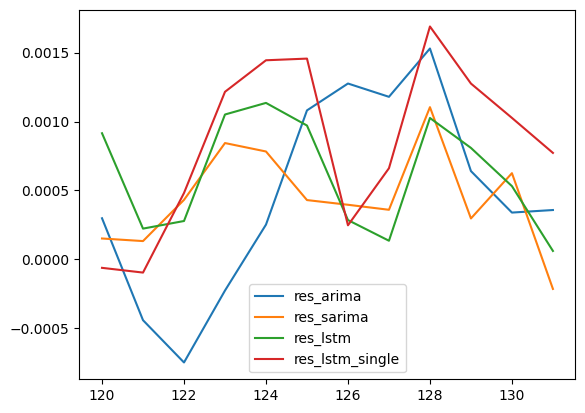

ARIMA rmse 0.0008236768121589829
SARIMA rmse 0.0005603386601405151
LSTM rmse 0.0007299181655847731
LSTM single rmse 0.0010232637096798162


In [64]:
res_a = Efficiency22[120:] - a_forecast_future[:]
plt.plot(res_a, label="res_arima")
res_s = Efficiency22[120:] - s_forecast_future[:]
plt.plot(res_s,label="res_sarima")

res_l = Efficiency22[120:] - Y_[120:]
res_ls = np.empty(132)
res_ls[:121] = np.nan
res_ls[120:] = res_l
plt.plot(res_ls,label="res_lstm")

res_l1 = Efficiency22[120:] - Y1[120:]
res_ls1 = np.empty(132)
res_ls1[:121] = np.nan
res_ls1[120:] = res_l1
plt.plot(res_ls1,label="res_lstm_single")
plt.legend()
plt.show()


rmse_a = np.sqrt(np.mean(res_a**2))
rmse_s = np.sqrt(np.mean(res_s**2))
rmse_l = np.sqrt(np.mean(res_l**2))
rmse_l1 = np.sqrt(np.mean(res_l1**2))

print("ARIMA rmse", rmse_a)
print("SARIMA rmse", rmse_s)
print("LSTM rmse", rmse_l)
print("LSTM single rmse", rmse_l1)


###############################################################**END**###########################################################################